In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
%matplotlib inline
from matplotlib.offsetbox import AnchoredText

def addsubfiglabels(axx):
    try:
        len(axx)
    except TypeError:
        return
    ascii_letters = 'abcdefghijklmnopqrstuvwxyz'*(len(axx.ravel())//26+1)
    for letter,ax in zip(ascii_letters,axx.ravel()):
        at = AnchoredText(letter,frameon=True, loc='upper left')#prop=dict(size=15)
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)

In [2]:
# all data folders
all_folders = [folder for folder in os.listdir() if folder.startswith("long_1") or folder.startswith("long_2")]
all_folders

['long_1499',
 'long_1551',
 'long_1551_2',
 'long_1551_3',
 'long_1599',
 'long_1649',
 'long_1699',
 'long_1750',
 'long_2001']

In [3]:
%%time
datafolder = "long_1599/"
raw_data=[]
for file in os.listdir(datafolder):
    data = ""
    with open(f"{datafolder}{file}","r") as f:
        data = f.readlines()
    raw_data.append( [int(d.split(",")[0]) for d in data[25:]] )
raw_data = np.array(raw_data)

Wall time: 4.44 s


In [4]:
header = data[:25]
header

['Format,1.0B,\n',
 'Memory Length,10000,\n',
 'IntpDistance,0,\n',
 'Trigger Address,4849,\n',
 'Trigger Level,8.000E-01,\n',
 'Source,CH1,\n',
 'Vertical Units,V,\n',
 'Vertical Units Div,0,\n',
 'Vertical Units Extend Div,16,\n',
 'Label,,\n',
 'Probe Type,0,\n',
 'Probe Ratio,1.000e+01,\n',
 'Vertical Scale,2.000e-01,\n',
 'Vertical Position,-6.800e-01,\n',
 'Horizontal Units,S,\n',
 'Horizontal Scale,2.000E-06,\n',
 'Horizontal Position,3.000E-07,\n',
 'Horizontal Mode,Main,\n',
 'SincET Mode,Real Time,\n',
 'Sampling Period,2.000e-09,\n',
 'Horizontal Old Scale,2.000E-06,\n',
 'Horizontal Old Position,3.000E-07,\n',
 'Firmware,V1.23,\n',
 'Mode,Fast,\n',
 'Waveform Data,\n']

In [5]:
scope_settings = [d[:-2] for i,d in list(enumerate(data)) if i in [4,12,13,15,19]]
print(scope_settings)
trigger_level = float(data[4].split(",")[1])
vert_scale = float(data[12].split(",")[1])
vert_pos = float(data[13].split(",")[1])
trigger_level,vert_scale,vert_pos,np.max(raw_data),np.min(raw_data)

['Trigger Level,8.000E-01', 'Vertical Scale,2.000e-01', 'Vertical Position,-6.800e-01', 'Horizontal Scale,2.000E-06', 'Sampling Period,2.000e-09']


(0.8, 0.2, -0.68, 127, -3)

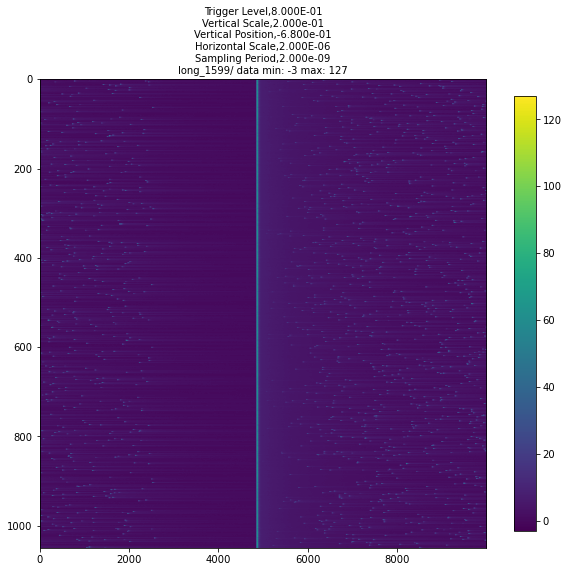

Wall time: 869 ms


In [6]:
%%time
fig,ax = plt.subplots(figsize=(10,10))
im = ax.imshow(np.array(raw_data),interpolation=None,aspect=10)
plt.colorbar(im,ax=ax,shrink=0.8)
ax.set_title("\n".join(scope_settings)+"\n"+datafolder+f" data min: {np.min(raw_data)} max: {np.max(raw_data)}",fontsize=10)
plt.show()

# how does `trigger level`, `input voltage` affect the distribution of peaks?

Wall time: 45.4 s


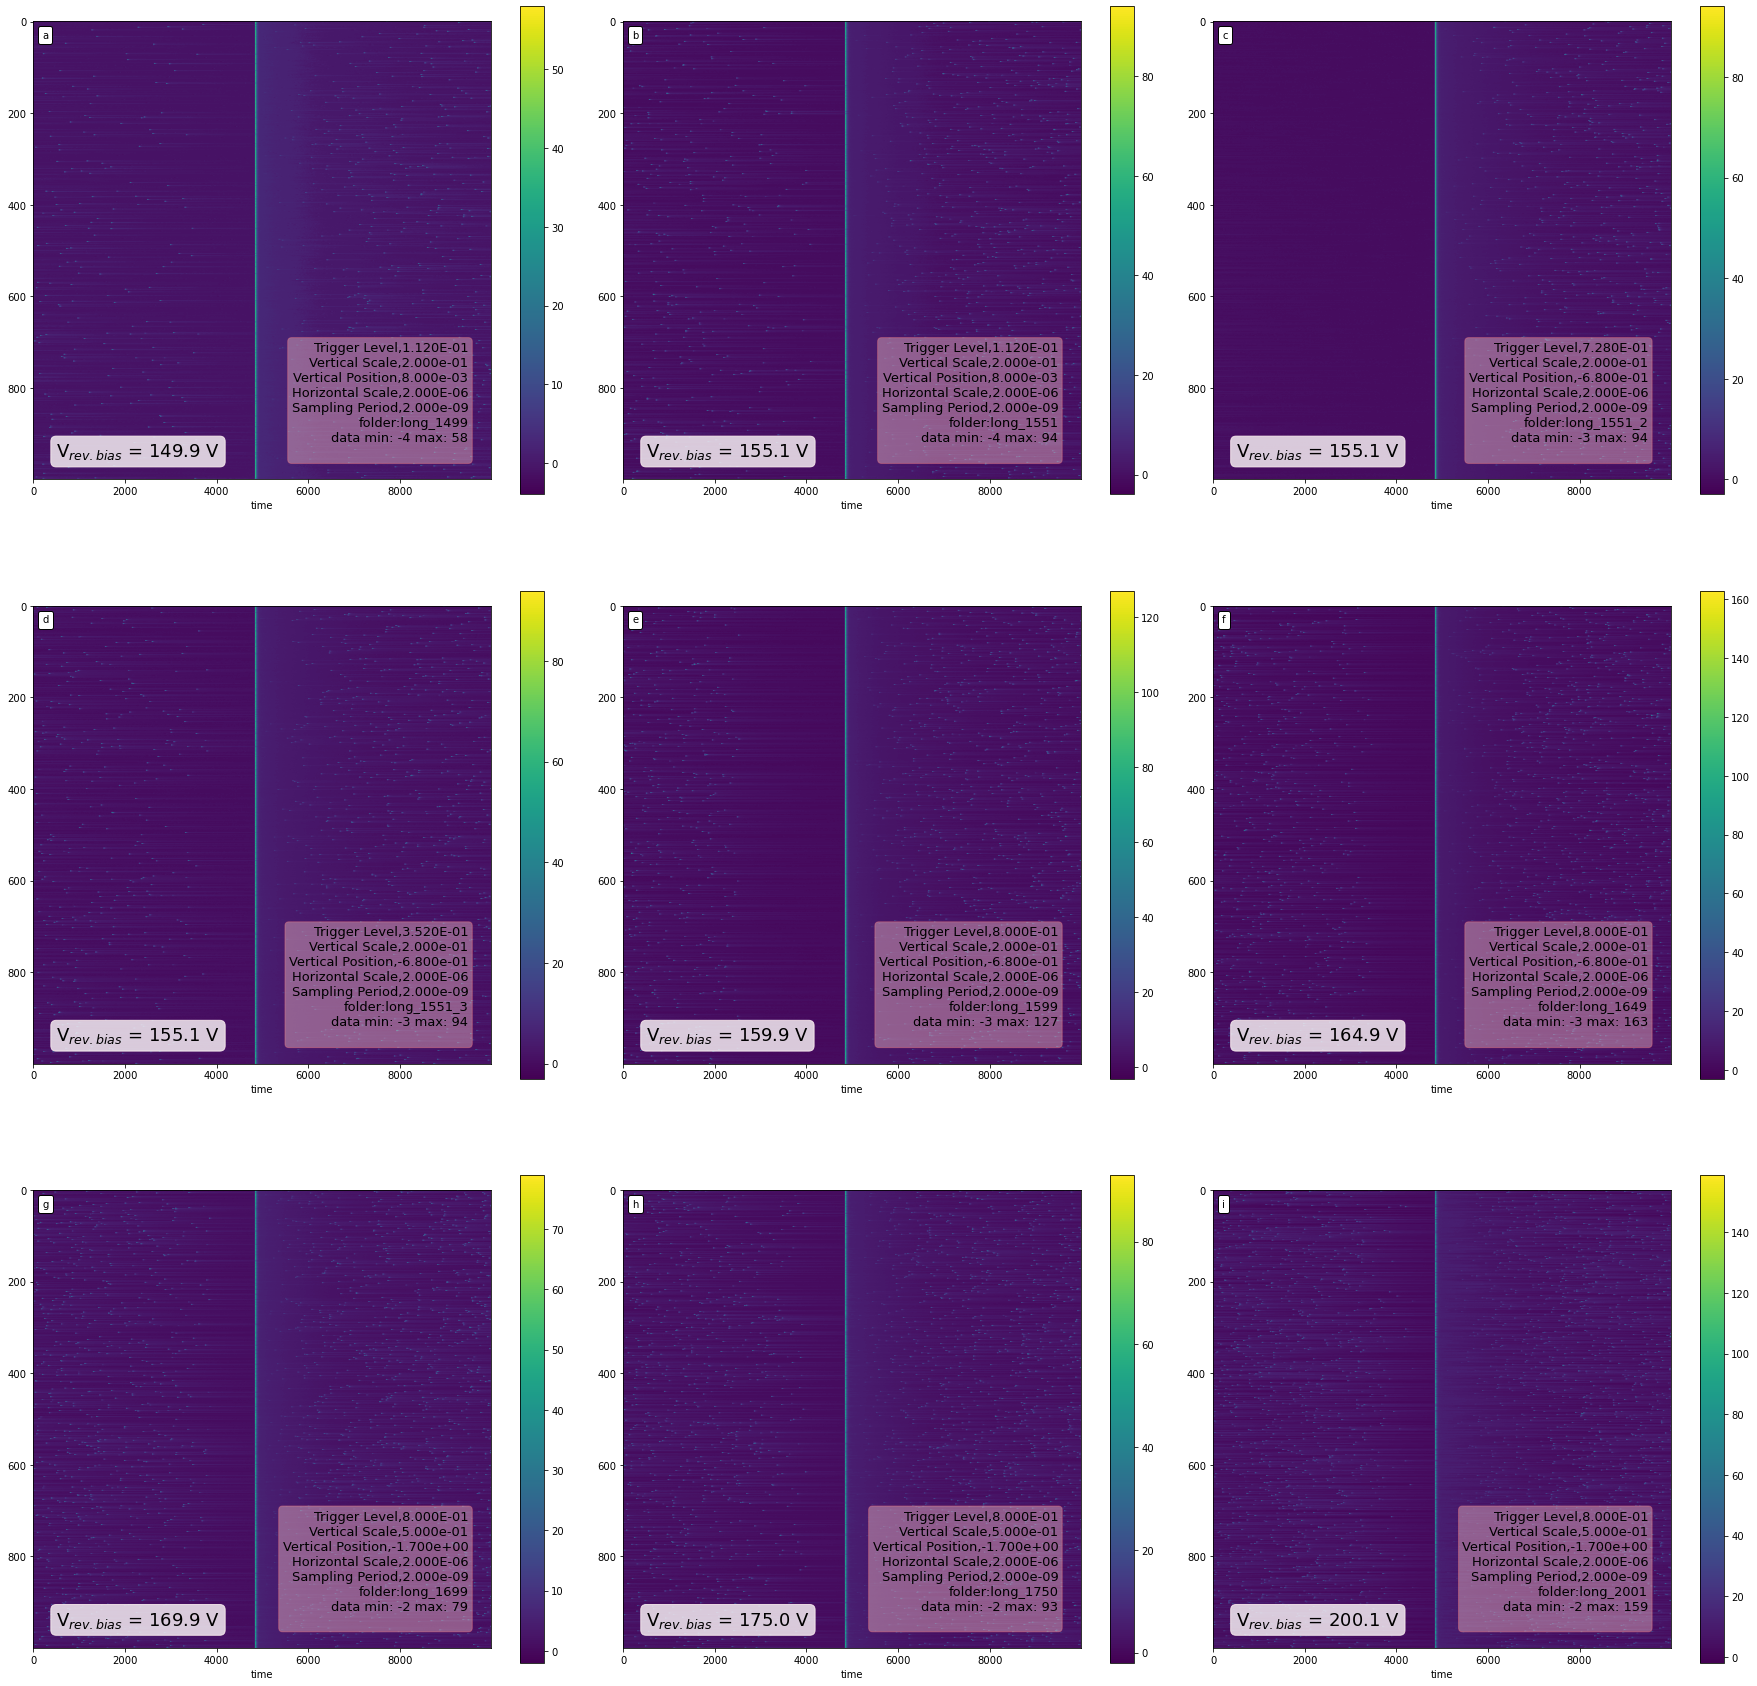

In [7]:
%%time
fig,axx = plt.subplots(3,3,figsize=(25,25))
axx=axx.ravel()
for i,datafolder in enumerate(all_folders):
    ax=axx[i]
    raw_data=[]
    for file in os.listdir(datafolder)[:1000]:
        data = ""
        with open(f"{datafolder}/{file}","r") as f:
            data = f.readlines()
        raw_data.append( [int(d.split(",")[0]) for d in data[25:]] )
    raw_data = np.array(raw_data)
    scope_settings = [d[:-2] for i,d in list(enumerate(data)) if i in [4,12,13,15,19]]
    # print(scope_settings)
    trigger_level = float(data[4].split(",")[1])
    vert_scale = float(data[12].split(",")[1])
    vert_pos = float(data[13].split(",")[1])
    trigger_level,vert_scale,vert_pos,np.max(raw_data),np.min(raw_data)
    im = ax.imshow(np.array(raw_data),interpolation=None,aspect=10)
    plt.colorbar(im,ax=ax,shrink=0.8)
    ax.text(0.95,0.05,"\n".join(scope_settings)+"\nfolder:"+datafolder+
            f"\ndata min: {np.min(raw_data)} max: {np.max(raw_data)}\n",
            fontsize=13,ha="right", transform=ax.transAxes,
            bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5,0.4), fc=(1., 0.8, 0.8,0.4)))
    ax.text(0.05,0.05,r"V$_{rev. bias}$ = "+f"{float(datafolder[5:9])/10:.1f} V",
            fontsize=18,ha="left", transform=ax.transAxes,
            bbox=dict(boxstyle="round", ec=(1., 0.95, 0.95,0.8), fc=(1., 0.98, 0.98,0.8)))
    ax.set_xlabel("time")
plt.tight_layout()
addsubfiglabels(axx)
plt.savefig("results01_01comparing_triggerlevel_voltage.png",dpi=100)